In [1]:
from numpy import array, dot, linspace, sign
from scipy.special import factorial
from math import fabs, sin, cos, pi
import matplotlib.pyplot as plt

In [49]:
nb_samples = 2000

In [50]:
def f0(t):
    return fabs(t-(nb_samples)/2)

In [51]:
ts = [0] + list(map(lambda x: x , linspace(1, nb_samples, nb_samples)))

In [52]:
fs = list(map(lambda t: f0(t), ts))

z_HOUND= [500.0000000000005]
K^ 0  HOUND= 500.0000000000005


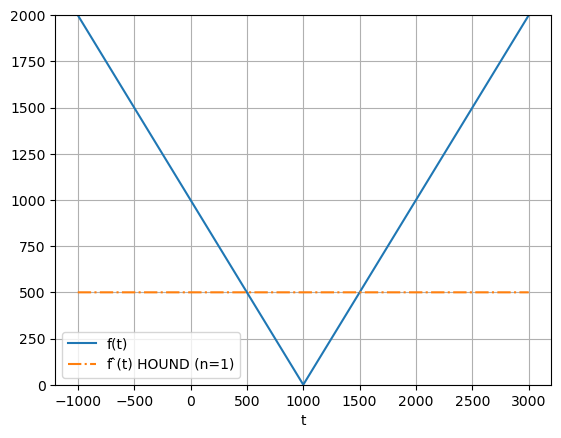

z_HOUND= [501.15871149740633, 0.0007837967342950103]
K^ 0  HOUND= 499.5911180288163
K^ 1  HOUND= 0.0007837967342950103


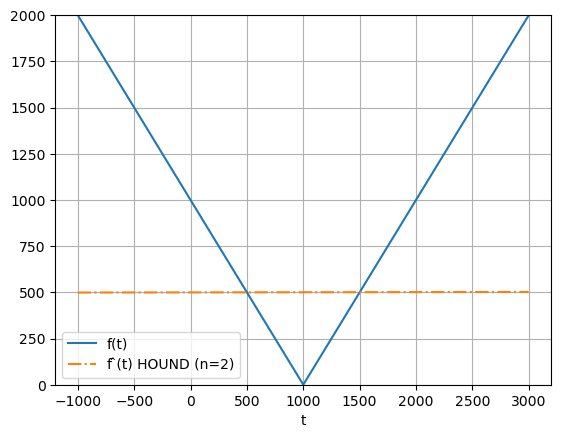

z_HOUND= [1124.531886817241, 1.873544844524697, 0.0018736130474940422]
K^ 0  HOUND= 1124.6682927559318
K^ 1  HOUND= -1.8736812504633875
K^ 2  HOUND= 0.0009368065237470211


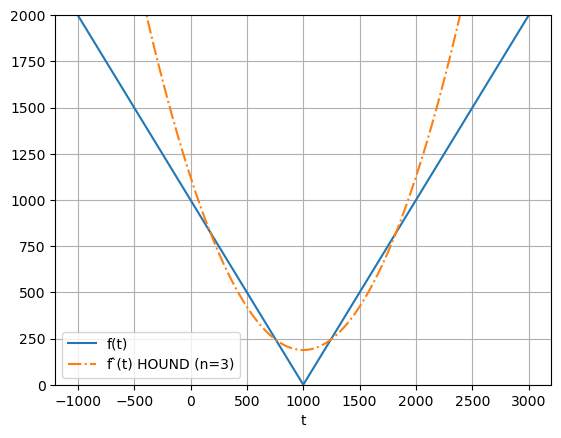

z_HOUND= [1123.6533684968683, 1.8716615210660104, 0.0018701263541247221, -3.303344341414649e-09]
K^ 0  HOUND= 1124.9874937361783
K^ 1  HOUND= -1.8751978758662633
K^ 2  HOUND= 0.0009383665214037757
K^ 3  HOUND= -5.505573902357749e-10


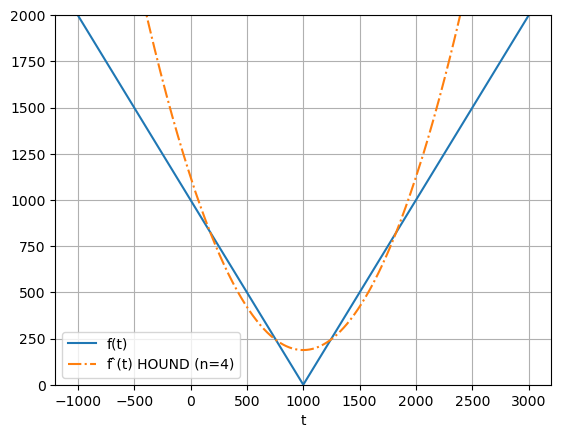

z_HOUND= [912.9809770110145, -0.3015590867190672, -0.008156052085107366, -2.3942740365374228e-05, -2.4456952864101564e-08]
K^ 0  HOUND= 823.013557999011
K^ 1  HOUND= 0.7343348382159576
K^ 2  HOUND= -0.0045922385412810185
K^ 3  HOUND= 4.161860893804817e-06
K^ 4  HOUND= -1.0190397026708985e-09


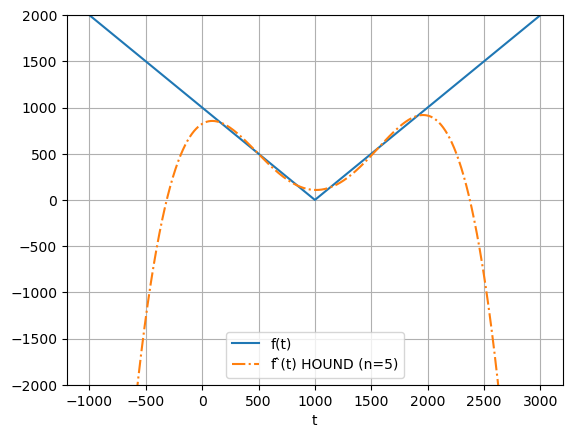

z_HOUND= [-824956593823.1378, -14654281349.224558, -117441002.26209782, -529497.4474459311, -1326.0197544725825, -1.4622582391206342]
K^ 0  HOUND= 5520558958786.0625
K^ 1  HOUND= -45579658500.53735
K^ 2  HOUND= 119596017.92272246
K^ 3  HOUND= -133662.4027903392
K^ 4  HOUND= 66.60403015702859
K^ 5  HOUND= -0.012185485326005285


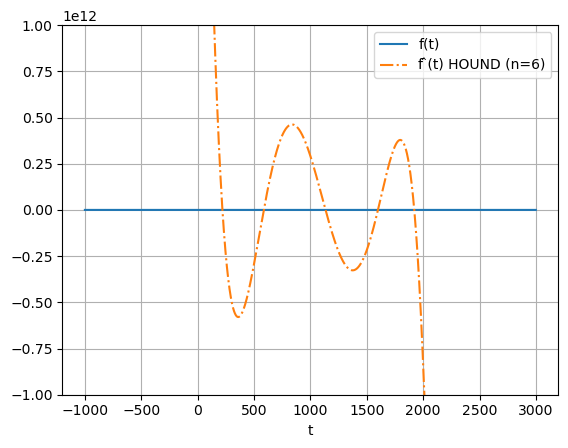

In [66]:
for n in range(1,7):
    z_HOUND = [0 for _ in range(n)]
    z_HOUND[0] = fs[0]
    zs_HOUND = [[z_HOUND[j]] for j in range(n)]

    ks_HOUND = [[] for _ in range(n)]
    ls = []
    for j in range(n):
        ls.append(linspace(0, n-1-j, n-j))
        ks_HOUND[j].append(0)

    fctrls = []
    for m in range(1,n+1):
        fctrls.append((factorial(n+m-1)/factorial(m)/factorial(n-m))*n)

    for i in range(1,len(ts)):
        t = ts[i]
        dt = ts[i]-ts[i-1]

        eps_HOUND = fs[i] - dot(dt**ls[0], z_HOUND[:] / factorial(ls[0]))
        z__HOUND = [dot(dt**ls[m-1] / factorial(ls[m-1]), z_HOUND[(m-1):]) + (dt*fctrls[m-1]/(t**m))*eps_HOUND for m in range(1,n+1)]
        k__HOUND = [dot((0-t)**ls[j] / factorial(ls[j]), z__HOUND[j:]) / factorial(j) for j in range(n)]
        for j in range(n):
            z_HOUND[j] = z__HOUND[j]
            zs_HOUND[j].append(z_HOUND[j])
            ks_HOUND[j].append(k__HOUND[j])

    interp_HOUND = []
    t = ts[-1]
    for i in range(len(ts)):
        tau = ts[i]
        interp_HOUND.append(dot((tau - t)**ls[0] / factorial(ls[0]), z_HOUND[:]))

    extra_prev_ts = []
    extra_prev_f0 = []
    extra_prev_z0_HOUND = []
    for tau in range(-int(nb_samples/2),0):
        extra_prev_ts.append(tau)
        extra_prev_f0.append(f0(tau))
        extra_prev_z0_HOUND.append(dot((tau - t)**ls[0] / factorial(ls[0]), z_HOUND[:]))

    extra_post_ts = []
    extra_post_f0 = []
    extra_post_z0_HOUND = []
    for tau in range(nb_samples,int(nb_samples*3/2)):
        extra_post_ts.append(tau)
        extra_post_f0.append(f0(tau))
        extra_post_z0_HOUND.append(dot((tau - t)**ls[0] / factorial(ls[0]), z_HOUND[:]))

    #print("f0[20000]",5-0.004*20000+0.0003*20000*20000-0.00002*20000*20000*20000+0.000001*20000*20000*20000*20000);
    print("z_HOUND=",z_HOUND)

    for j in range(n):
        print("K^",j," HOUND=", ks_HOUND[j][-1])

    fig, ax = plt.subplots()#figsize=(14, 8))
    if n <= 4:
        ax.set_ylim(0, nb_samples)
    if n == 5:
        ax.set_ylim(-nb_samples, nb_samples)
    if n == 6:
        ax.set_ylim(-1e12, 1e12)
    x = 1
    #ax.plot(ts, fs, label='f(t)')
    ax.plot(extra_prev_ts + ts+extra_post_ts[1:], extra_prev_f0 + fs + extra_post_f0[1:], label='f(t)', linestyle="solid")
    ax.plot(extra_prev_ts + ts+extra_post_ts[1:], extra_prev_z0_HOUND + interp_HOUND[1:] + extra_post_z0_HOUND, label='f ̂(t) HOUND (n='+str(n)+')', linestyle="dashdot")
    ax.set_xlabel("t")
    ax.grid();
    plt.legend()
    plt.show();